# Data Exploration

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import extract_lat_lon, haversine, count_within_band, calculate_distance_by_poi

crash_data = pd.read_csv("raw_data/Crash data_LA_county.csv")
harsh_accel_data = pd.read_csv("raw_data/Harsh Acceleration_Severity_Ranking_Clustering_LA_COUNTY_H10.csv")
harsh_braking_data = pd.read_csv("raw_data/Harsh Braking_Severity_Ranking_Clustering_LA_COUNTY_H10.csv")
poi_data = pd.read_csv("raw_data/POI Los Angeles County.csv")

In [3]:
print("shapes:", crash_data.shape, harsh_accel_data.shape, harsh_braking_data.shape, poi_data.shape)
print("columns: ")
print(" CRASH:", crash_data.columns.to_list())
print(" ACCEL:", harsh_accel_data.columns.to_list())
print(" BRAKE:", harsh_braking_data.columns.to_list())
print(" POI:", poi_data.columns.to_list())
print("POI types: ")
print(poi_data['poi'].unique(), poi_data['poi'].nunique())
print(poi_data['poi_type'].unique())

shapes: (290887, 11) (12868, 12) (8768, 12) (55713, 6)
columns: 
 CRASH: ['LATITUDE', 'LONGITUDE', 'ARC_ID', 'YEAR', 'VH', 'CYC', 'PED', 'FATAL', 'SERIOUS_INJURY', 'MINOR_INJURY', 'NO_INJURY']
 ACCEL: ['CLUSTER_ID', 'VEHICLE_COUNT', 'CENTROID', 'POLYGON', 'RANK', 'MULTILINESTRING_CLUSTERS', 'LENGTH_CLUSTER', 'LIST_ROAD_NAME', 'LIST_CITY_NAME', 'LIST_ROAD_PRIORITY', 'H3_ID', 'H3_GEOM']
 BRAKE: ['CLUSTER_ID', 'VEHICLE_COUNT', 'CENTROID', 'POLYGON', 'RANK', 'MULTILINESTRING_CLUSTERS', 'LENGTH_CLUSTER', 'LIST_ROAD_NAME', 'LIST_CITY_NAME', 'LIST_ROAD_PRIORITY', 'H3_ID', 'H3_GEOM']
 POI: ['point_id', 'longitude', 'latitude', 'location', 'poi', 'poi_type']
POI types: 
['pub' 'college' 'library' 'school' 'university' 'bus_station' 'bank'
 'hospital' 'pharmacy' 'cinema' 'nightclub' 'atm' 'bar' 'office'
 'bus_stop' 'crossing' 'park' 'sports_centre' 'convenience' 'deli'
 'grocery' 'mall' 'supermarket' 'paved' 'attraction' 'hostel' 'hotel'
 'viewpoint'] 28
['amenity' 'building' 'highway' 'leisure'

# Adding more columns

In [4]:
"""
# Add a new column to the crash data indicating distance to each POI
poi_latitudes = poi_data['latitude'].values
poi_longitudes = poi_data['longitude'].values
poi_types = poi_data['poi_type'].values

# We will calculate distances for each crash to each POI and categorize them based on POI type
crash_data['nearest_poi_type'] = None
crash_data['distance_to_poi'] = np.inf

for i, (poi_lat, poi_lon, poi_type) in enumerate(zip(poi_latitudes, poi_longitudes, poi_types)):
    # Calculate the distance between the crash and the current POI
    distances = haversine(crash_data['LATITUDE'].values, crash_data['LONGITUDE'].values, poi_lat, poi_lon)

    # For each crash, if this POI is the nearest one, update the nearest POI type and distance
    closer_poi = distances < crash_data['distance_to_poi']
    crash_data.loc[closer_poi, 'nearest_poi_type'] = poi_type
    crash_data.loc[closer_poi, 'distance_to_poi'] = distances[:crash_data[closer_poi].shape[0]]
    # print(i)
"""

"\n# Add a new column to the crash data indicating distance to each POI\npoi_latitudes = poi_data['latitude'].values\npoi_longitudes = poi_data['longitude'].values\npoi_types = poi_data['poi_type'].values\n\n# We will calculate distances for each crash to each POI and categorize them based on POI type\ncrash_data['nearest_poi_type'] = None\ncrash_data['distance_to_poi'] = np.inf\n\nfor i, (poi_lat, poi_lon, poi_type) in enumerate(zip(poi_latitudes, poi_longitudes, poi_types)):\n    # Calculate the distance between the crash and the current POI\n    distances = haversine(crash_data['LATITUDE'].values, crash_data['LONGITUDE'].values, poi_lat, poi_lon)\n\n    # For each crash, if this POI is the nearest one, update the nearest POI type and distance\n    closer_poi = distances < crash_data['distance_to_poi']\n    crash_data.loc[closer_poi, 'nearest_poi_type'] = poi_type\n    crash_data.loc[closer_poi, 'distance_to_poi'] = distances[:crash_data[closer_poi].shape[0]]\n    # print(i)\n"

In [5]:
"""
harsh_accel_data['LATITUDE'], harsh_accel_data['LONGITUDE'] = zip(*harsh_accel_data['CENTROID'].apply(extract_lat_lon))
harsh_braking_data['LATITUDE'], harsh_braking_data['LONGITUDE'] = zip(*harsh_braking_data['CENTROID'].apply(extract_lat_lon))

nearest_accel_poi_type = []
nearest_accel_poi_distance = []
nearest_braking_poi_type = []
nearest_braking_poi_distance = []

for index, row in harsh_accel_data.iterrows():
    distances = haversine(row['LATITUDE'], row['LONGITUDE'], poi_latitudes, poi_longitudes)
    min_distance_idx = np.argmin(distances)
    nearest_accel_poi_type.append(poi_types[min_distance_idx])
    nearest_accel_poi_distance.append(distances[min_distance_idx])

for index, row in harsh_braking_data.iterrows():
    distances = haversine(row['LATITUDE'], row['LONGITUDE'], poi_latitudes, poi_longitudes)
    min_distance_idx = np.argmin(distances)
    nearest_braking_poi_type.append(poi_types[min_distance_idx])
    nearest_braking_poi_distance.append(distances[min_distance_idx])

harsh_accel_data['nearest_poi_type'] = nearest_accel_poi_type
harsh_accel_data['distance_to_poi'] = nearest_accel_poi_distance
harsh_braking_data['nearest_poi_type'] = nearest_braking_poi_type
harsh_braking_data['distance_to_poi'] = nearest_braking_poi_distance
"""

"\nharsh_accel_data['LATITUDE'], harsh_accel_data['LONGITUDE'] = zip(*harsh_accel_data['CENTROID'].apply(extract_lat_lon))\nharsh_braking_data['LATITUDE'], harsh_braking_data['LONGITUDE'] = zip(*harsh_braking_data['CENTROID'].apply(extract_lat_lon))\n\nnearest_accel_poi_type = []\nnearest_accel_poi_distance = []\nnearest_braking_poi_type = []\nnearest_braking_poi_distance = []\n\nfor index, row in harsh_accel_data.iterrows():\n    distances = haversine(row['LATITUDE'], row['LONGITUDE'], poi_latitudes, poi_longitudes)\n    min_distance_idx = np.argmin(distances)\n    nearest_accel_poi_type.append(poi_types[min_distance_idx])\n    nearest_accel_poi_distance.append(distances[min_distance_idx])\n\nfor index, row in harsh_braking_data.iterrows():\n    distances = haversine(row['LATITUDE'], row['LONGITUDE'], poi_latitudes, poi_longitudes)\n    min_distance_idx = np.argmin(distances)\n    nearest_braking_poi_type.append(poi_types[min_distance_idx])\n    nearest_braking_poi_distance.append(dis

In [6]:
"""
crash_data.to_csv('processed_data/crash_data.csv', index=False)
harsh_accel_data.to_csv('processed_data/harsh_accel_data.csv', index=False)
harsh_braking_data.to_csv('processed_data/harsh_braking_data.csv', index=False)
"""

"\ncrash_data.to_csv('processed_data/crash_data.csv', index=False)\nharsh_accel_data.to_csv('processed_data/harsh_accel_data.csv', index=False)\nharsh_braking_data.to_csv('processed_data/harsh_braking_data.csv', index=False)\n"

# Data Analysis - number

In [7]:
crash_data = pd.read_csv('processed_data/crash_data.csv')
harsh_accel_data = pd.read_csv('processed_data/harsh_accel_data.csv')
harsh_braking_data = pd.read_csv('processed_data/harsh_braking_data.csv')

In [8]:
crash_counts = crash_data['nearest_poi_type'].value_counts()
accel_counts = harsh_accel_data['nearest_poi_type'].value_counts()
braking_counts = harsh_braking_data['nearest_poi_type'].value_counts()

combined_df = pd.DataFrame({
    'crash': crash_counts,
    'harsh_accel': accel_counts,
    'harsh_braking': braking_counts
})
combined_df.fillna(0, inplace=True)
combined_df

,crash,harsh_accel,harsh_braking
amenity,8687,828.0,531.0
building,10,0.0,0.0
highway,71233,11379.0,7857.0
leisure,2304,96.0,50.0
shop,61449,380.0,242.0
surface,2559,0.0,4.0
tourism,144645,185.0,84.0


In [9]:
crash_severity_poi = crash_data.groupby('nearest_poi_type').agg(
    fatal_crashes=('FATAL', 'sum'),
    serious_injury_crashes=('SERIOUS_INJURY', 'sum'),
    minor_injury_crashes=('MINOR_INJURY', 'sum'),
    no_injury_crashes=('NO_INJURY', 'sum')
)
crash_severity_poi['total_crashes'] = crash_severity_poi.sum(axis=1)
crash_severity_poi

,fatal_crashes,serious_injury_crashes,minor_injury_crashes,no_injury_crashes,total_crashes
nearest_poi_type,,,,,
amenity,218.0,783.0,2884.0,4802.0,8687.0
building,0.0,1.0,0.0,9.0,10.0
highway,1272.0,5639.0,22530.0,41792.0,71233.0
leisure,45.0,191.0,737.0,1331.0,2304.0
shop,1141.0,4855.0,19272.0,36181.0,61449.0
surface,34.0,200.0,803.0,1522.0,2559.0
tourism,2201.0,11168.0,46261.0,85014.0,144644.0


In [10]:
distance_rings = [0, 0.5, 1, 2, 5, 10]  # Rings from 0 to 10 km

print("Crash: ")
display(count_within_band(distance_rings, crash_data))
print("Harsh accel: ")
display(count_within_band(distance_rings, harsh_accel_data))
print("Harsh braking: ")
display(count_within_band(distance_rings, harsh_braking_data))

Crash: 


,<0.5km,<1.0km,<2.0km,<5.0km,<10.0km
highway,41876,19178,8168,1400,447
tourism,2421,5195,13096,37493,34265
shop,8089,12155,18103,18605,3876
amenity,5364,1594,655,711,336
surface,62,100,343,1239,807
leisure,493,747,769,243,33
building,6,1,0,2,0


Harsh accel: 


,<0.5km,<1.0km,<2.0km,<5.0km,<10.0km
highway,10993,315,71,0,0
amenity,668,129,31,0,0
leisure,59,17,20,0,0
tourism,105,69,11,0,0
shop,334,44,2,0,0


Harsh braking: 


,<0.5km,<1.0km,<2.0km,<5.0km,<10.0km
highway,7548,261,48,0,0
shop,219,23,0,0,0
tourism,63,16,5,0,0
amenity,470,57,4,0,0
leisure,41,9,0,0,0
surface,4,0,0,0,0


# Data Analysis - visual

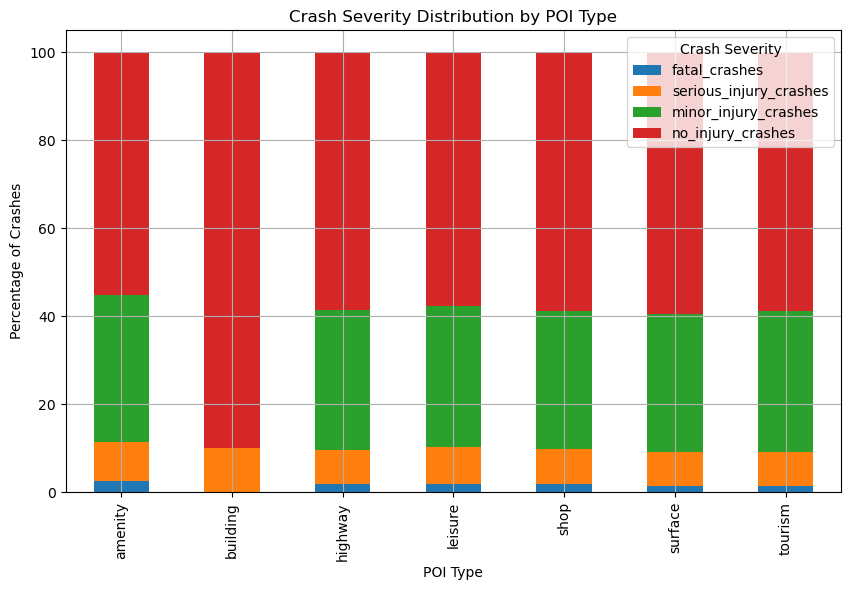

In [11]:
crash_severity_poi_pct = crash_severity_poi.div(crash_severity_poi['total_crashes'], axis=0) * 100
crash_severity_poi_pct.drop(columns='total_crashes').plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Crash Severity Distribution by POI Type')
plt.xlabel('POI Type')
plt.ylabel('Percentage of Crashes')
plt.legend(title='Crash Severity')
plt.grid(True)
plt.show()

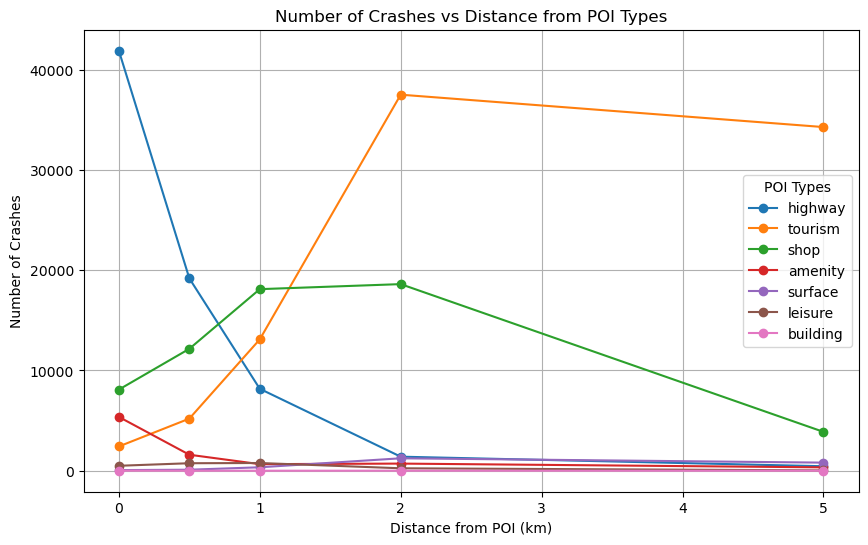

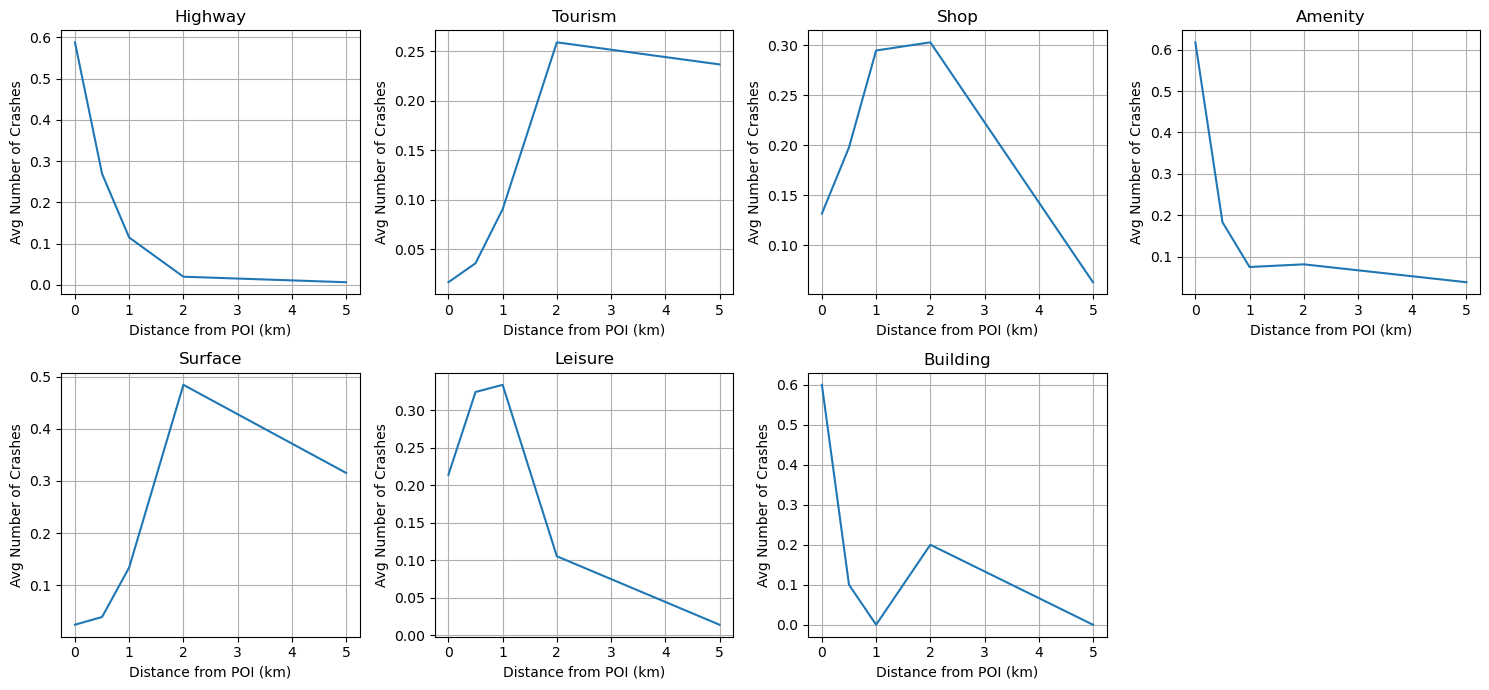

In [12]:
plt.figure(figsize=(10, 6))
for poi_type in crash_data['nearest_poi_type'].unique():
    crashes_by_distance = calculate_distance_by_poi(poi_type, crash_data, distance_rings)
    plt.plot(distance_rings[:-1], crashes_by_distance, marker='o', linestyle='-', label=poi_type)
plt.title('Number of Crashes vs Distance from POI Types')
plt.xlabel('Distance from POI (km)')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.legend(title='POI Types')
plt.show()


poi_types = crash_data['nearest_poi_type'].unique()
fig, axes = plt.subplots(2, 4, figsize=(15, 7))
axes = axes.flatten()
for i, poi_type in enumerate(poi_types):
    crashes_by_distance = calculate_distance_by_poi(poi_type, crash_data, distance_rings)
    axes[i].plot(distance_rings[:-1], crashes_by_distance/crash_severity_poi['total_crashes'][poi_type])
    axes[i].set_title(f'{poi_type.capitalize()}')
    axes[i].set_xlabel('Distance from POI (km)')
    axes[i].set_ylabel('Avg Number of Crashes')
    axes[i].grid(True)
if len(poi_types) % 2 != 0:
    fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()